In [1]:
cd drive/MyDrive/Dacon/LDI/Model

/content/drive/MyDrive/Dacon/LDI/Model


In [2]:
import pickle
import pandas as pd
import numpy as np
with open('../Preprocessed_data/v3/traindata.txt', 'rb') as f:
    X = pickle.load(f)

In [3]:
X.shape

(15000, 60)

In [4]:
import pickle
import pandas as pd
import numpy as np
with open('../Preprocessed_data/v3/traindata.txt', 'rb') as f:
    X = pickle.load(f)
    

In [5]:
train_problem_data = pd.read_csv('../dataset/train_problem_data.csv',thousands = ',')

In [6]:
df_tpd = train_problem_data.drop_duplicates()
problem_list = list(df_tpd['user_id'].unique())
y = np.zeros(15000,)
for pi in problem_list:
    y[pi-10000] = 1

In [7]:
columns = []
for i in range(1,43):
    s = 'err_' + str(i)
    columns.append(s)
columns.append('23_ct')
columns.append('23_as')
columns.append('23_ac')
columns.append('31_0')
columns.append('40_0')
for i in range(13):
    s = 'quality_' + str(i)
    columns.append(s)
len(columns)

X = pd.DataFrame(X,columns=columns)

In [8]:
with open('X', 'wb') as f:
    pickle.dump(X, f)

In [9]:
X = pd.DataFrame(X,columns=columns)

In [10]:
X.head()

,err_1,err_2,err_3,err_4,err_5,err_6,err_7,err_8,err_9,err_10,err_11,err_12,err_13,err_14,err_15,err_16,err_17,err_18,err_19,err_20,err_21,err_22,err_23,err_24,err_25,err_26,err_27,err_28,err_29,err_30,err_31,err_32,err_33,err_34,err_35,err_36,err_37,err_38,err_39,err_40,err_41,err_42,23_ct,23_as,23_ac,31_0,40_0,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0.0,0.0,8.0,104.0,0.0,1.0,1.0,0.0,0.0,7.0,15.0,16.0,1.0,10.0,59.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,48.0,1.0,1.0,0.0,0.0,0.0,10.0,11.0,1.0,8.0,143.0,128.0,0.0,4.0,1.0,3.0,1.0,756.0,0.0,5.0,1.0,22.0,0.0,0.0,0.0,0.0,124.0,0.0,10.0,18.0,0.0,1.0,1.0,0.0,0.0,57.0,56.0,1.0,0.0,126.0,625.0,126.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,131.0,1.0,2.0,1.0,0.0,0.0,1.0,13.0,14.0,1.0,4.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,25.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,45.0,30.0,1.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,32.0,0.0,8.0,0.0,0.0,1.0,1.0,2.0,0.0,9.0,1.0,0.0,7.0,12.0,0.0,33.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,0.0,16.0,19.0,3.0,5.0,143.0,91.0,0.0,0.0,0.0,0.0,0.0,140.0,3.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,81.0,0.0,16.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,104.0,7.0,5.0,95.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
from sklearn.model_selection import train_test_split
X_t, X_test, y_t, y_test = train_test_split(X,y, test_size = 0.3, random_state = 11)
X_train, X_val,y_train, y_val = train_test_split(X_t,y_t,test_size=0.2, random_state = 10)

In [12]:
y_train

array([1., 0., 0., ..., 0., 0., 0.])

In [13]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
eval_set=[(X_val,y_val)]
nes = [100,200,500,1000]
lrs = [0.02,0.05,0.1,0.12]
mds = [3,5,7,10]
params = []
score = 0
for ne in nes:
    for lr in lrs:
        for md in mds:
            xgb = XGBClassifier(n_estimators = ne, learning_rate = lr, max_depth = md, objective= 'binary:logistic')
            xgb.fit(X_train,y_train,eval_set = eval_set, eval_metric='auc',early_stopping_rounds = 20,verbose=False)  
            xgb_pred = xgb.predict(X_test)
            xgb_probability = xgb.predict_proba(X_test)
            xgb_prob = xgb_probability[:,1]
            temp_score = roc_auc_score(y_test,xgb_prob)
            print(temp_score)
            if temp_score > score:
                score = temp_score
                params = [ne,lr,md]
print(score)
print(params)
            


0.7846319548791096
0.7963900501822522
0.7993811919003833
0.7965661913252284
0.7952494014795856
0.8017984145499774
0.8026141906853688
0.7994030972083426
0.7982222326069608
0.8011911320123946
0.8014847754739634
0.7988456913719597
0.7964720546684593
0.7994455598053101
0.8035566806021871
0.7899496649723565
0.7929031744947626
0.8014782600490319
0.8034786078379214
0.7974308331476062
0.7973078264182957
0.8017984145499774
0.8026141906853688
0.7994030972083426
0.7982222326069608
0.8011911320123946
0.8014847754739634
0.7988456913719597
0.7964720546684593
0.7994455598053101
0.8035566806021871
0.7899496649723565
0.7973416392269921
0.8020989104412156
0.80363205732855
0.7974308331476062
0.7973078264182957
0.8017984145499774
0.8026141906853688
0.7994030972083426
0.7982222326069608
0.8011911320123946
0.8014847754739634
0.7988456913719597
0.7964720546684593
0.7994455598053101
0.8035566806021871
0.7899496649723565
0.7973416392269921
0.8020989104412156
0.80363205732855
0.7974308331476062
0.79730782641829

In [14]:
xgb = XGBClassifier(n_estimators = params[0], learning_rate = params[1], max_depth = params[2], objective= 'binary:logistic')
xgb.fit(X_train,y_train,eval_set = eval_set, eval_metric='auc',early_stopping_rounds = 20,verbose=False)  
xgb_pred = xgb.predict(X_test)
xgb_probability = xgb.predict_proba(X_test)
xgb_prob = xgb_probability[:,1]
temp_score = roc_auc_score(y_test,xgb_prob)

AxesSubplot(0.125,0.125;0.775x0.755)


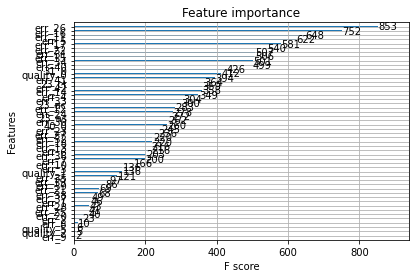

In [15]:
print(plot_importance(xgb))

In [20]:

from sklearn.metrics import roc_auc_score


roc_auc_score(y_test,xgb_pred)
roc_auc_score(y_test,xgb_prob)


0.80363205732855

In [29]:
with open('../Preprocessed_data/v3/testdata.txt', 'rb') as f:
    testdata = pickle.load(f)

In [26]:
testdata.shape

(14999, 60)

In [33]:
# df_x = (df_x - df_x.mean())/df_x.std()
# testdata = df_x.dropna(axis=1)
test_X = pd.DataFrame(testdata,columns=columns)
test_pred = xgb.predict_proba(test_X)[:,1]

In [34]:
test_pred[13260:13270]

array([0.33316332, 0.29608434, 0.14088243, 0.20264386, 0.25714082,
       0.11241805, 0.19785267, 0.09439886, 0.10456976, 0.0538302 ],
      dtype=float32)

In [35]:
res_dict = {}
for user_id in range(30000,44999):
    if user_id == 43262:
        res_dict[user_id] =0
    elif user_id < 43262:
        res_dict[user_id] = test_pred[user_id - 30000]
    else:
        res_dict[user_id] = test_pred[user_id - 30001]

In [36]:
import csv

with open('result.csv','w') as csvfile:
    fieldnames = ['user_id','problem']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(30000,44999):
        if i not in res_dict.keys():
            writer.writerow({'user_id':i,'problem':0})
        else:
            writer.writerow({'user_id':i,'problem':res_dict[i]})

In [ ]:
len(res_dict)